In [1]:
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 10)})

# 1. Carregando os dados

In [2]:
positives_df = pd.read_csv("../data/extreme_positive.csv").drop_duplicates("review_id")
negatives_df = pd.read_csv("../data/extreme_negative.csv").drop_duplicates("review_id")
nlp = spacy.load("en_core_web_md")


# 2. Aplicando pre-processamento

TODO: descrever brevemente o processamento

In [3]:
positives_df["review_body"] = apply_text_processing_pipeline(positives_df["review_body"])
negatives_df["review_body"] = apply_text_processing_pipeline(negatives_df["review_body"])

In [4]:
len(positives_df), len(negatives_df)

(3315, 513)

# 3. Visualizando palavras mais frequentes (considerando reviews positivas e negativas)

TODO: descrever motivação

In [5]:
# Amostrando para caber na memória :(
raw_text_p = "\n".join(positives_df["review_body"].sample(frac=.5).to_list())
raw_text_n = "\n".join(negatives_df["review_body"].to_list())

In [6]:
word_freq_df = get_word_frequency_df(nlp(raw_text_p + raw_text_n))

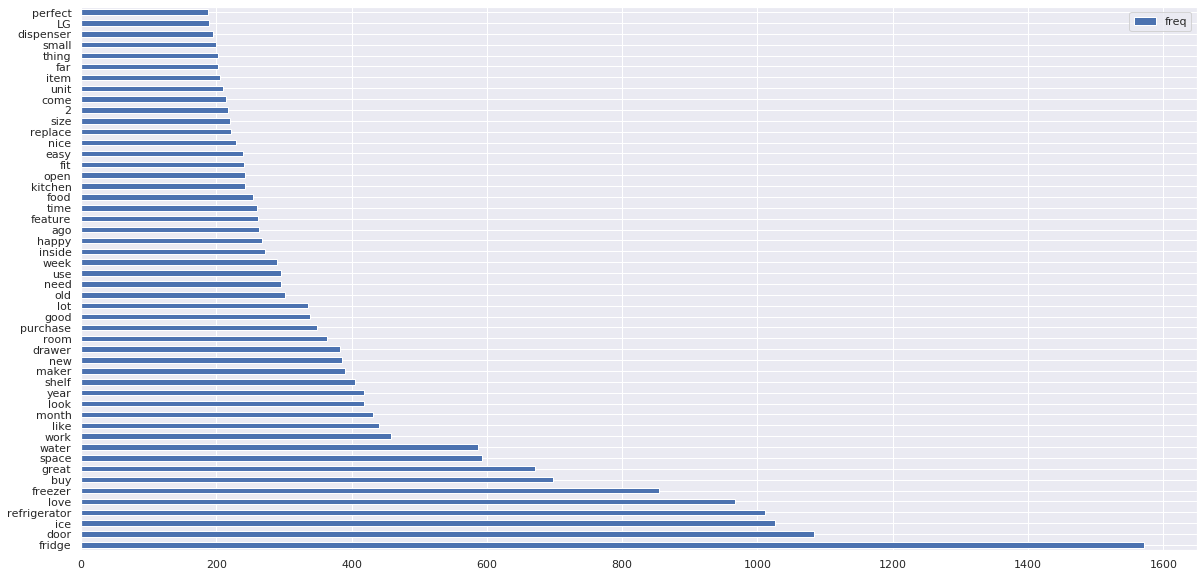

In [7]:
word_freq_df.head(50).plot.barh()

## 3.1 Salvando palavras mais frequentes para posterior filtragem

In [8]:
import json
most_freq = word_freq_df.index.to_list()[:200]
with open("../data/frequent_words.json", "w") as f:
    json.dump(most_freq, f, indent=2)


# 4. Avaliando n-grams

TODO: descrever motivação

## 4.1 Reviews positivas

In [9]:
ngram_df = get_ngram_df(nlp(raw_text_p))

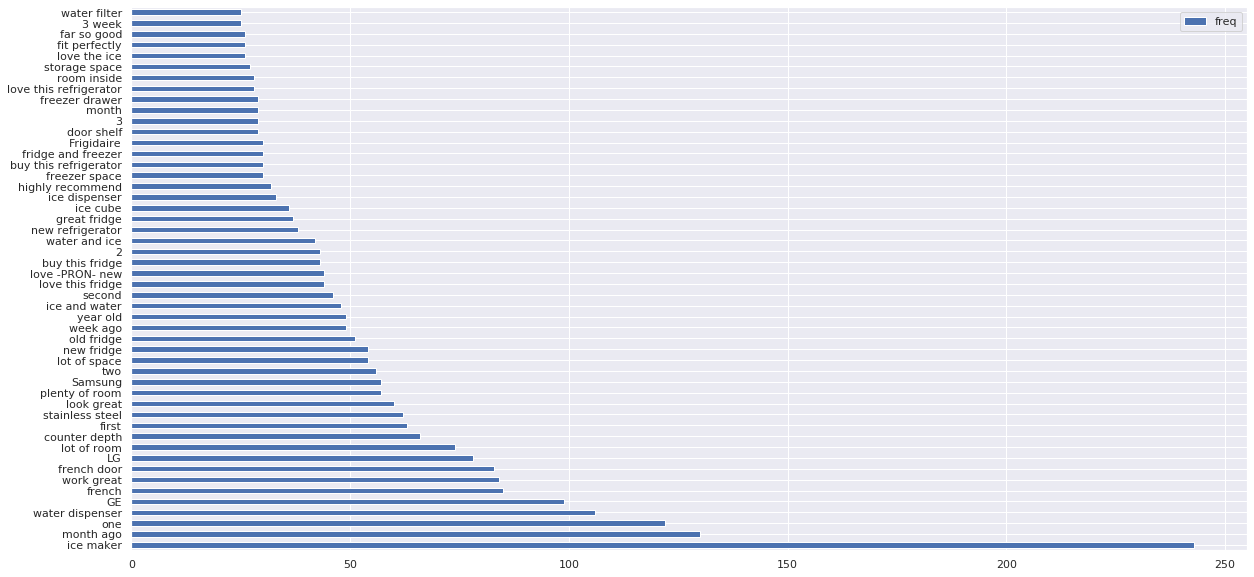

In [10]:
ngram_df.head(50).plot.barh()

## 4.2 Reviews negativas

In [11]:
ngram_df = get_ngram_df(nlp(raw_text_n))

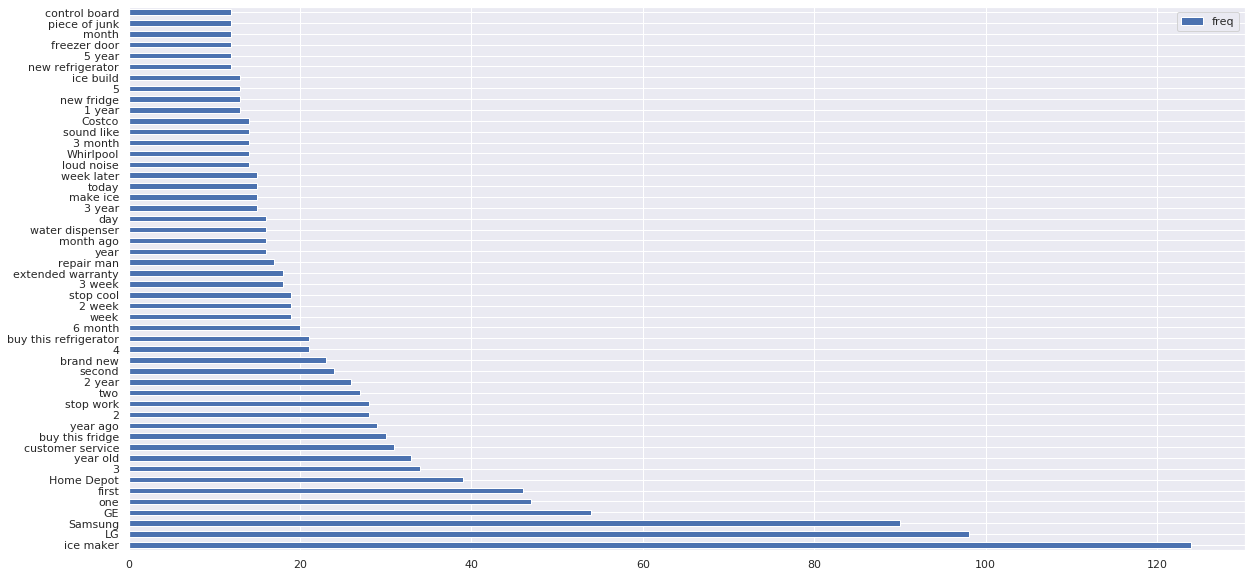

In [12]:
ngram_df.head(50).plot.barh()

# 5. Análise de WordClouds

TODO: explicar ...

## 5.1 Carregando termos frequentes indesejados

TODO: descrever, foram escolhidos termos a remover manualmente, a partir dos termos mais frequentes (ex: "refrigerator", etc)

In [13]:
with open("../data/ignore_words.json", "r") as f:
    ignore = json.load(f)

## 5.2 Reviews positivas

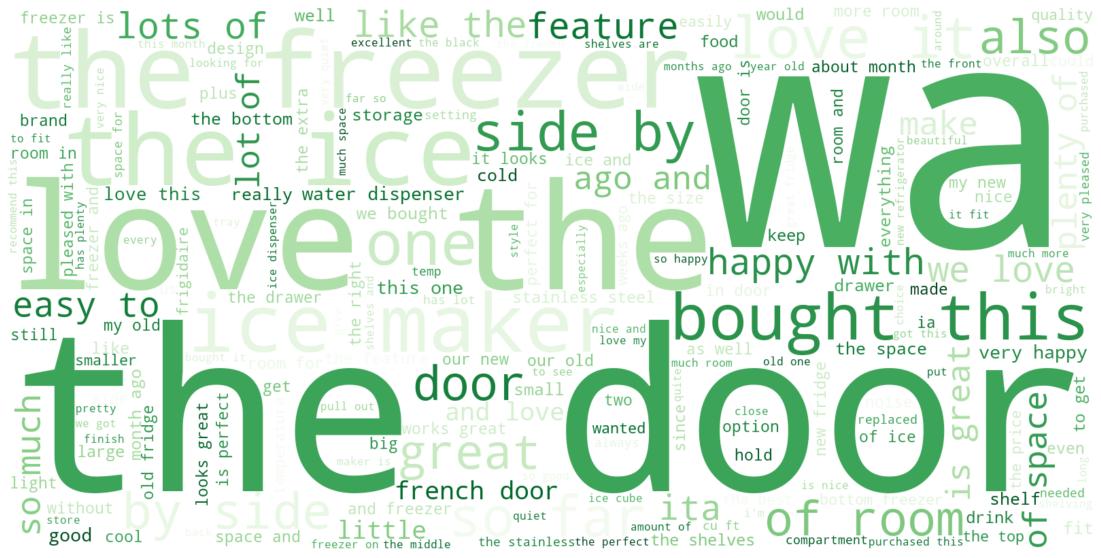

In [14]:
build_wordcloud(raw_text_p, additional_stop_words=ignore, color_map="Greens")

## 5.3 Reviews negativas

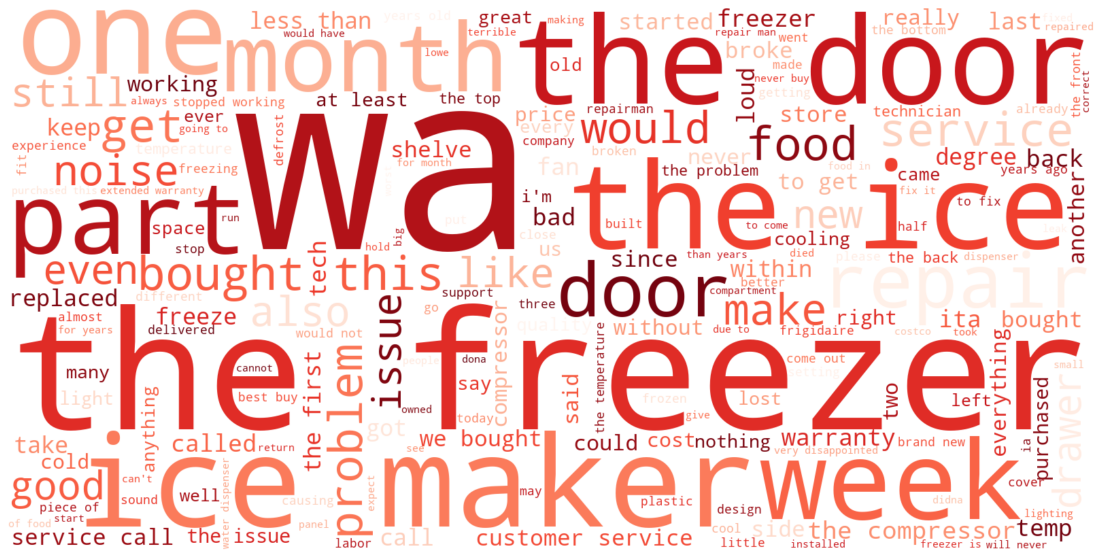

In [15]:
build_wordcloud(raw_text_n, additional_stop_words=ignore, color_map="Reds")